In [1]:
import pandas as pd
from pathlib import Path

%matplotlib notebook

# Goal
What is Kaggle: tbd
Competition description:
> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
> 
> With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to **predict the final price of each home**.
Practice Skills
>
>    - Creative feature engineering 
>    - Advanced regression techniques like random forest and gradient boosting
>
> Acknowledgments
>
> The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 


In [2]:
SWE_INPUT_PATH = Path.cwd() / "swe_data"
raw_df = pd.read_csv(SWE_INPUT_PATH / "train.csv")

Puh, what do we got here?
1. How many rows and columns are there?
2. What are the column names?
3. Print the head of the df

In [3]:
print("Number of rows and columns: ", raw_df.shape)
print(raw_df.columns)
raw_df.head()

Number of rows and columns:  (1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Garag

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


For easier working, let's make our dataset a little smaller and only select some of the variables. Assign a smaller dataset to a new variable and only select `Id, SalePrice, YearBuilt, GrLivArea, TotalBsmtSF, PoolArea, TotRmsAbvGrd`.


In [4]:
df = raw_df.loc[:, ["Id", "SalePrice", "YearBuilt", "GrLivArea", "TotalBsmtSF", "PoolArea", "TotRmsAbvGrd"]]

Let's look at our target variable, `SalePrice`:
 1. How many observations are there?
 2. What is the average price?
 3. What is the min and max price?
 4. How old is the oldest and youngest house in the data?
 5. How big is the biggest pool?

In [9]:
df.loc[:, ["SalePrice", "YearBuilt", "PoolArea"]].describe()

,SalePrice,YearBuilt,PoolArea
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,1971.267808,2.758904
std,79442.502883,30.202904,40.177307
min,34900.000000,1872.000000,0.000000
25%,129975.000000,1954.000000,0.000000
50%,163000.000000,1973.000000,0.000000
75%,214000.000000,2000.000000,0.000000
max,755000.000000,2010.000000,738.000000


TODO: 
1. Some stuff about continous and categorical variables
2. Some groupby aggregation stuff
3. Show some nice plotting 

<IPython.core.display.Javascript object>


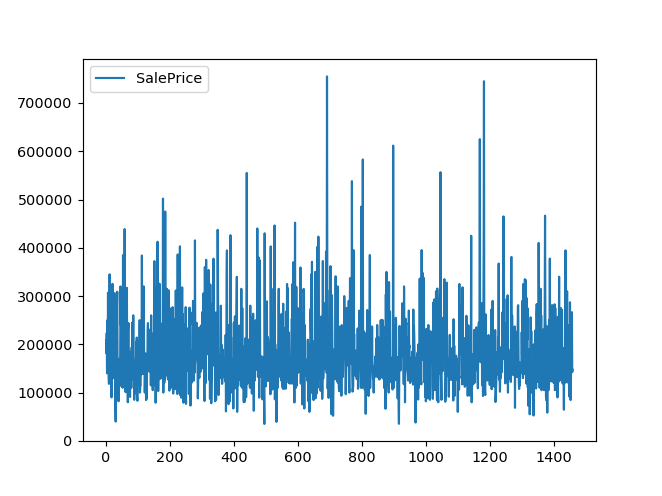

In [8]:
df.loc[:, ["SalePrice"]].plot()